In [ ]:
http://yann.lecun.com/exdb/mnist/
    
    
jadi, bentuk baris kolom:
    baris = angkanya (70000) 
    kolom = byte (784 atau 28 x 28)

In [4]:
from sklearn.datasets import fetch_openml

X,y = fetch_openml('mnist_784', data_home='./dataset/mnist', return_X_y=True)
X.shape

(70000, 784)

In [30]:
y.shape

(70000,)

In [32]:
data.shape

(784,)

In [17]:
X[1:2,:].shape

(1, 784)

In [29]:
X[:8,:].shape

(8, 784)

In [33]:
data.reshape((28,28))

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

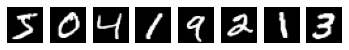

In [14]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

pos = 1
for data in X[:8,:]:
    plt.subplot(1,8,pos)
    plt.imshow(data.reshape(((28,28))),
              cmap=cm.Greys_r)
    plt.axis('off')
    pos += 1
    
plt.show()

In [12]:
y[:8]

array(['5', '0', '4', '1', '9', '2', '1', '3'], dtype=object)

In [34]:
X_train = X[:60000]
y_train = y[:60000]

X_test = X[60000:]
y_test = y[60000:]


# X_train = X[:1000]
# y_train = y[:1000]

# X_test = X[69000:]
# y_test = y[69000:]


In [36]:
# Support Vector Classifier (SVC)
from sklearn.svm import SVC

model = SVC(random_state=0)
model.fit(X_train, y_train)



SVC(random_state=0)

In [38]:
y_pred = model.predict(X_test)

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
numeric 1 dan numeric 1 
atau numeric banyak categorical banyak dengan dimensi lebih dari D2

Decision boundary (Hyperlane)

    **  *    /
      *     /
    *  *   /
          /   * *   *
         /      * *
        /     *



jika data tidak bisa di berikan hyperlane dengan 2D (linearly inseparable)
maka akan dijadikan 3D (stretch dengan menambahkan variabel yg sebetulnya tidak ada/perbedaan angka)

https://www.quora.com/What-is-the-kernel-trick?share=1
kernel tricks:
        polynomial
        sigmoid
        RBF (Radial Basis Function)



In [ ]:
modelling svm

#1
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm=SVC()
param_grid = { 
    "C" : [0.1, 1],
    "gamma" : [0.1, 1],
    "kernel":["linear","rbf"]
}

#2
from sklearn.model_selection import GridSearchCV
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv= 2)

#3 intinya
CV_svm.fit(train_X, train_y)

#4
CV_svm.best_params_
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

#5


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    "C" : [0.5, 1, 10, 100],
    "gamma" : ["scale", 1, 0.1, 0.01, 0.001],
    "kernel":["rbf", "poly", "sigmoid"]
}

CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, n_jobs=2, verbose=1, scoring='accuracy')

CV_svm.fit(train_X, train_y)

print(CV_svm.best_params_)

print(f'best score: {CV_svm.best_score_}')

best_params = CV_svm.best_estimator_.get_params()
print(f'Best parameters:')
for param in parameters:
    print(f'\t{param}: {best_params[param]}')

In [ ]:
Parameters
    C float, default=1.0
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

    kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).

    degreeint, default=3
Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

    gamma{‘scale’, ‘auto’} or float, default=’scale’
Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,

if ‘auto’, uses 1 / n_features.

Changed in version 0.22: The default value of gamma changed from ‘auto’ to ‘scale’.

    coef0float, default=0.0
Independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’.

    shrinkingbool, default=True
Whether to use the shrinking heuristic. See the User Guide.

    probabilitybool, default=False
Whether to enable probability estimates. This must be enabled prior to calling fit, will slow down that method as it internally uses 5-fold cross-validation, and predict_proba may be inconsistent with predict. Read more in the User Guide.

    tol float, default=1e-3
Tolerance for stopping criterion.

    cache_sizefloat, default=200
Specify the size of the kernel cache (in MB).

    class_weightdict or ‘balanced’, default=None
Set the parameter C of class i to class_weight[i]*C for SVC. If not given, all classes are supposed to have weight one. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))

    verbosebool, default=False
Enable verbose output. Note that this setting takes advantage of a per-process runtime setting in libsvm that, if enabled, may not work properly in a multithreaded context.

    max_iterint, default=-1
Hard limit on iterations within solver, or -1 for no limit.

    decision_function_shape{‘ovo’, ‘ovr’}, default=’ovr’
Whether to return a one-vs-rest (‘ovr’) decision function of shape (n_samples, n_classes) as all other classifiers, or the original one-vs-one (‘ovo’) decision function of libsvm which has shape (n_samples, n_classes * (n_classes - 1) / 2). However, one-vs-one (‘ovo’) is always used as multi-class strategy. The parameter is ignored for binary classification.

Changed in version 0.19: decision_function_shape is ‘ovr’ by default.

New in version 0.17: decision_function_shape=’ovr’ is recommended.

Changed in version 0.17: Deprecated decision_function_shape=’ovo’ and None.

    break_tiesbool, default=False
If true, decision_function_shape='ovr', and number of classes > 2, predict will break ties according to the confidence values of decision_function; otherwise the first class among the tied classes is returned. Please note that breaking ties comes at a relatively high computational cost compared to a simple predict.

New in version 0.22.

    random_stateint, RandomState instance or None, default=None
Controls the pseudo random number generation for shuffling the data for probability estimates. Ignored when probability is False. Pass an int for reproducible output across multiple function calls. See Glossary.